<a href="https://colab.research.google.com/github/Hartheek1704/house-price-prediction-ml/blob/main/house-price-prediction-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("/content/Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             49 non-null     int64 
 1   area              49 non-null     int64 
 2   bedrooms          49 non-null     int64 
 3   bathrooms         49 non-null     int64 
 4   stories           49 non-null     int64 
 5   mainroad          49 non-null     object
 6   guestroom         49 non-null     object
 7   basement          49 non-null     object
 8   hotwaterheating   49 non-null     object
 9   airconditioning   49 non-null     object
 10  parking           49 non-null     int64 
 11  prefarea          49 non-null     object
 12  furnishingstatus  49 non-null     object
dtypes: int64(6), object(7)
memory usage: 5.1+ KB


In [ ]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000
mean,8.979703e+06,7066.061224,3.489796,1.897959,2.673469,1.489796
std,1.380255e+06,2116.228262,0.616524,0.653353,1.048566,0.793790
min,7.455000e+06,3500.000000,3.000000,1.000000,1.000000,0.000000
25%,8.043000e+06,6000.000000,3.000000,2.000000,2.000000,1.000000
50%,8.575000e+06,6600.000000,3.000000,2.000000,2.000000,2.000000
75%,9.310000e+06,7800.000000,4.000000,2.000000,4.000000,2.000000
max,1.330000e+07,16200.000000,5.000000,4.000000,4.000000,3.000000


In [ ]:
df.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
le = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,0,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,0,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,0,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,0,1,1,0,1,2,0,0


In [ ]:
X = df.drop('price', axis=1)
y = df['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 1418991.890268974
R² Score: -4.818142833706356


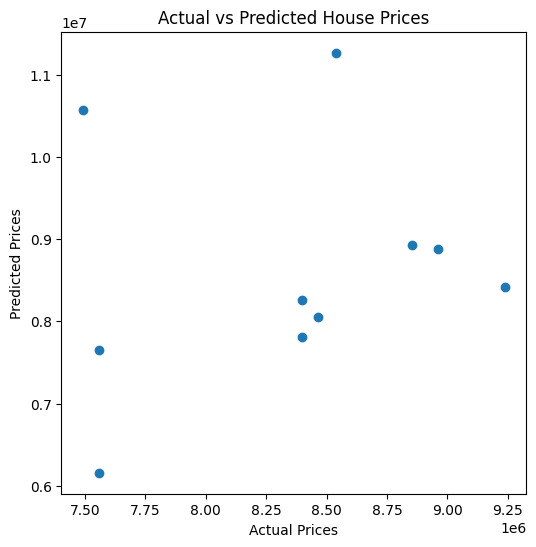

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
10,prefarea,1.424885e+06
9,parking,1.089871e+06
5,guestroom,6.431345e+05
2,bathrooms,5.124307e+05
1,bedrooms,2.692799e+05
6,basement,4.195652e+03
0,area,1.627346e+02
4,mainroad,2.910383e-10
3,stories,-1.808403e+05
11,furnishingstatus,-3.172950e+05
